In [1]:
# Allows us to work with dataframes
import pandas as pd
# Used to run linear regression models
from sklearn.linear_model import LinearRegression
# Used to run decision tree models
from sklearn.tree import DecisionTreeRegressor
# Used to run random forest models
from sklearn.ensemble import RandomForestRegressor
# Used to calculate statistics (such as accuracy score for a model)
import numpy as np
# Used to split dataframe into training and testing data sets
from sklearn.model_selection import train_test_split
# Used to scale the data in the training and testing sets
from sklearn.preprocessing import StandardScaler
# Used to run decision tree models
from sklearn.tree import DecisionTreeRegressor
# Used to print model accuracy statistics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Meta-estimator to regress on a transformed target 
# Useful for applying a non-linear transformation to the target y in regression problems
from sklearn.compose import TransformedTargetRegressor
# 
from sklearn.preprocessing import QuantileTransformer
# Used to run grid searches (test multiple models at once)
from sklearn.model_selection import GridSearchCV
# import the seaborn library
import seaborn as sns
# import the matplot library
import matplotlib.pyplot as plt

In [2]:
# Read the cleaned data file and assign it to a dataframe
muddy_p_df = pd.read_excel('mp_dummies.xlsx')

In [3]:
# Check the average stay of a Muddy Paws animal
print('The mean length of stay is: ', muddy_p_df.length_of_stay_days.mean())
# Check the median stay of a Muddy Paws animal
print('The median length of stay is: ', muddy_p_df.length_of_stay_days.median())
# Check the maximum length of stay
print('The maximum length of stay is: ', muddy_p_df.length_of_stay_days.max())
# Check the minimum length of stay
print('The minimum length of stay is: ', muddy_p_df.length_of_stay_days.min())

The mean length of stay is:  137.10314769975787
The median length of stay is:  51.0
The maximum length of stay is:  1971
The minimum length of stay is:  0


In [4]:
def stay_categories(row):  
    if row['length_of_stay_days'] > 0 and row['length_of_stay_days'] <= 50:
        return 'short_stay'
    elif row['length_of_stay_days'] > 50 and row['length_of_stay_days'] <= 500:
        return 'medium_stay'
    elif row['length_of_stay_days'] > 500  and row['length_of_stay_days'] <= 1000:
        return 'long_stay'
    elif row['length_of_stay_days'] > 1000:
        return 'extra_long_stay'
    return ''

In [5]:
muddy_p_df.head(1)

,Unnamed: 0,length_of_stay_days,age_total_years,age_total_months,adoption_fee,pet_breed_31 flavors mixes,pet_breed_american bulldog,pet_breed_american pit bull terrier,pet_breed_american staffordshire terrier,pet_breed_australian cattle dog,...,special_need_yes,gets_along_with_cats_no,gets_along_with_cats_not sure,gets_along_with_cats_yes,gets_along_with_dogs_no,gets_along_with_dogs_not sure,gets_along_with_dogs_yes,gets_along_with_kids_no,gets_along_with_kids_not sure,gets_along_with_kids_yes
0,1,43,12.583333,151,400,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [6]:
muddy_p_df['stay_category'] = muddy_p_df.apply(lambda row: stay_categories(row), axis = 1)

In [7]:
muddy_p_df = muddy_p_df.drop('length_of_stay_days', axis = 1)

In [8]:
pd.set_option('display.max_columns', 500)

In [9]:
muddy_p_df.head(1)

,Unnamed: 0,age_total_years,age_total_months,adoption_fee,pet_breed_31 flavors mixes,pet_breed_american bulldog,pet_breed_american pit bull terrier,pet_breed_american staffordshire terrier,pet_breed_australian cattle dog,pet_breed_australian shepherd,pet_breed_basset hound,pet_breed_beagle,pet_breed_belgian malinois,pet_breed_bichon frise,pet_breed_black mouth cur,pet_breed_blue heeler,pet_breed_bluetick coonhound,pet_breed_border collie,pet_breed_boston terrier,pet_breed_boxer,pet_breed_bulldog,pet_breed_cane corso,pet_breed_catahoula leopard dog,pet_breed_cattle dog,pet_breed_chihuahua,pet_breed_chinese crested,pet_breed_cocker spaniel,pet_breed_collie,pet_breed_corgi,pet_breed_dachshund,pet_breed_doberman pinscher,pet_breed_english bulldog,pet_breed_german shepherd dog,pet_breed_german shorthaired pointer,pet_breed_golden retriever,pet_breed_goldendoodle,pet_breed_great dane,pet_breed_great pyrenees,pet_breed_havanese,pet_breed_hound (unknown type),pet_breed_hounds (all types),pet_breed_husky,pet_breed_jack russell terrier,pet_breed_labrador retriever,pet_breed_lhasa apso,pet_breed_maltese,pet_breed_mastiff,pet_breed_miniature pinscher,pet_breed_miniature schnauzer,pet_breed_other,pet_breed_papillon,pet_breed_pit bull terrier,pet_breed_pomeranian,pet_breed_poodle (miniature),pet_breed_poodle (toy or tea cup),pet_breed_pug,pet_breed_rat terrier,pet_breed_rottweiler,pet_breed_schnauzer (miniature),pet_breed_schnauzer (standard),pet_breed_shepherds (all types),pet_breed_shiba inu,pet_breed_shih tzu,pet_breed_staffordshire bull terrier,pet_breed_terrier (unknown type,pet_breed_terriers (medium),pet_breed_terriers (small),pet_breed_vizsla,pet_breed_yorkie,litter_name_10,litter_name_14,litter_name_a team,litter_name_amber,litter_name_angel,litter_name_annie,litter_name_arkansas,litter_name_autumn,litter_name_b,litter_name_barn puppy,litter_name_beagle,litter_name_bella,litter_name_bella rey puppy,litter_name_birdie,litter_name_blessing,litter_name_blue,litter_name_bonitas,litter_name_border,litter_name_border collie,litter_name_boxer pu,litter_name_bridget,litter_name_brindle,litter_name_brooks,litter_name_capital,litter_name_catahoula,litter_name_chihuahua puppy,litter_name_collins,litter_name_cookie,litter_name_cookie monster,litter_name_crayola,litter_name_denali pup,litter_name_disney,litter_name_dogs of summer,litter_name_dundee,litter_name_egypt,litter_name_eliza,litter_name_elli,litter_name_ellison,litter_name_fancy,litter_name_farrah,litter_name_flora,litter_name_forrest gump,litter_name_game of thrones,litter_name_gemma,litter_name_gigi,litter_name_godiva,litter_name_halloween,litter_name_happy,litter_name_harper,litter_name_hot coco,litter_name_isabella puppy,litter_name_jade,litter_name_jewels precious gems,litter_name_joplin,litter_name_kacie,litter_name_kimmie,litter_name_koko,litter_name_lab,litter_name_loki,litter_name_louisiana eleven,litter_name_luxury,litter_name_mama mabel,litter_name_marissa,litter_name_marvel,litter_name_meela,litter_name_milan,litter_name_missouri,litter_name_missouri pu,litter_name_mist,litter_name_nacho,litter_name_nala,litter_name_nanook,litter_name_oklahoma 11,litter_name_oklahoma lab,litter_name_opal,litter_name_out of this world,litter_name_overwatch,litter_name_oz,litter_name_pooka,litter_name_pookie,litter_name_potter (fka,litter_name_powder puff,litter_name_pyr,litter_name_raven,litter_name_reindeer,litter_name_riley,litter_name_rio,litter_name_river,litter_name_rook,litter_name_rosemary,litter_name_rosie,litter_name_rosies pup,litter_name_royal,litter_name_ruby,litter_name_sadie,litter_name_santa,litter_name_sasha,litter_name_shayla,litter_name_skye,litter_name_skye (mom of,litter_name_smokey,litter_name_smokie,litter_name_sokka,litter_name_sookie,litter_name_star wars,litter_name_suki,litter_name_texas pu,litter_name_three,litter_name_tinker bell fairy,litter_name_treasured,litter_name_trolley,litter_name_tulsa tote,litter_name_tx 13,litter_name_vino du paw,litter_name_wine and ch

In [10]:
muddy_p_df = muddy_p_df.drop('Unnamed: 0', axis = 1)

In [11]:
muddy_p_df.head(1)

,age_total_years,age_total_months,adoption_fee,pet_breed_31 flavors mixes,pet_breed_american bulldog,pet_breed_american pit bull terrier,pet_breed_american staffordshire terrier,pet_breed_australian cattle dog,pet_breed_australian shepherd,pet_breed_basset hound,pet_breed_beagle,pet_breed_belgian malinois,pet_breed_bichon frise,pet_breed_black mouth cur,pet_breed_blue heeler,pet_breed_bluetick coonhound,pet_breed_border collie,pet_breed_boston terrier,pet_breed_boxer,pet_breed_bulldog,pet_breed_cane corso,pet_breed_catahoula leopard dog,pet_breed_cattle dog,pet_breed_chihuahua,pet_breed_chinese crested,pet_breed_cocker spaniel,pet_breed_collie,pet_breed_corgi,pet_breed_dachshund,pet_breed_doberman pinscher,pet_breed_english bulldog,pet_breed_german shepherd dog,pet_breed_german shorthaired pointer,pet_breed_golden retriever,pet_breed_goldendoodle,pet_breed_great dane,pet_breed_great pyrenees,pet_breed_havanese,pet_breed_hound (unknown type),pet_breed_hounds (all types),pet_breed_husky,pet_breed_jack russell terrier,pet_breed_labrador retriever,pet_breed_lhasa apso,pet_breed_maltese,pet_breed_mastiff,pet_breed_miniature pinscher,pet_breed_miniature schnauzer,pet_breed_other,pet_breed_papillon,pet_breed_pit bull terrier,pet_breed_pomeranian,pet_breed_poodle (miniature),pet_breed_poodle (toy or tea cup),pet_breed_pug,pet_breed_rat terrier,pet_breed_rottweiler,pet_breed_schnauzer (miniature),pet_breed_schnauzer (standard),pet_breed_shepherds (all types),pet_breed_shiba inu,pet_breed_shih tzu,pet_breed_staffordshire bull terrier,pet_breed_terrier (unknown type,pet_breed_terriers (medium),pet_breed_terriers (small),pet_breed_vizsla,pet_breed_yorkie,litter_name_10,litter_name_14,litter_name_a team,litter_name_amber,litter_name_angel,litter_name_annie,litter_name_arkansas,litter_name_autumn,litter_name_b,litter_name_barn puppy,litter_name_beagle,litter_name_bella,litter_name_bella rey puppy,litter_name_birdie,litter_name_blessing,litter_name_blue,litter_name_bonitas,litter_name_border,litter_name_border collie,litter_name_boxer pu,litter_name_bridget,litter_name_brindle,litter_name_brooks,litter_name_capital,litter_name_catahoula,litter_name_chihuahua puppy,litter_name_collins,litter_name_cookie,litter_name_cookie monster,litter_name_crayola,litter_name_denali pup,litter_name_disney,litter_name_dogs of summer,litter_name_dundee,litter_name_egypt,litter_name_eliza,litter_name_elli,litter_name_ellison,litter_name_fancy,litter_name_farrah,litter_name_flora,litter_name_forrest gump,litter_name_game of thrones,litter_name_gemma,litter_name_gigi,litter_name_godiva,litter_name_halloween,litter_name_happy,litter_name_harper,litter_name_hot coco,litter_name_isabella puppy,litter_name_jade,litter_name_jewels precious gems,litter_name_joplin,litter_name_kacie,litter_name_kimmie,litter_name_koko,litter_name_lab,litter_name_loki,litter_name_louisiana eleven,litter_name_luxury,litter_name_mama mabel,litter_name_marissa,litter_name_marvel,litter_name_meela,litter_name_milan,litter_name_missouri,litter_name_missouri pu,litter_name_mist,litter_name_nacho,litter_name_nala,litter_name_nanook,litter_name_oklahoma 11,litter_name_oklahoma lab,litter_name_opal,litter_name_out of this world,litter_name_overwatch,litter_name_oz,litter_name_pooka,litter_name_pookie,litter_name_potter (fka,litter_name_powder puff,litter_name_pyr,litter_name_raven,litter_name_reindeer,litter_name_riley,litter_name_rio,litter_name_river,litter_name_rook,litter_name_rosemary,litter_name_rosie,litter_name_rosies pup,litter_name_royal,litter_name_ruby,litter_name_sadie,litter_name_santa,litter_name_sasha,litter_name_shayla,litter_name_skye,litter_name_skye (mom of,litter_name_smokey,litter_name_smokie,litter_name_sokka,litter_name_sookie,litter_name_star wars,litter_name_suki,litter_name_texas pu,litter_name_three,litter_name_tinker bell fairy,litter_name_treasured,litter_name_trolley,litter_name_tulsa tote,litter_name_tx 13,litter_name_vino du paw,litter_name_wine and cheese,litter

In [12]:
muddy_p_df = muddy_p_df.drop('age_total_years', axis = 1)

In [13]:
muddy_p_df = muddy_p_df.drop(['current_status_returned to owner', 'current_status_adopted'], axis = 1)

### Split into Training and Test Data

In [14]:
# Assign all the data minus length of stay to X
X = muddy_p_df.drop(['stay_category'], axis = 1)
# Assign length_of_stay_days column to y
y = muddy_p_df.stay_category

In [15]:
# Split the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

### Scale the Data

In [16]:
# Assign StandardScaler to scaler
scaler = StandardScaler()

In [17]:
# Scale the training data
train_scaled = scaler.fit_transform(X_train)

In [18]:
# Scale the test data
test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [22]:
model.fit(train_scaled, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [23]:
model.predict(test_scaled)

array(['medium_stay', 'medium_stay', 'short_stay', 'short_stay',
       'short_stay', 'short_stay', 'medium_stay', 'medium_stay',
       'medium_stay', 'short_stay', 'medium_stay', 'short_stay',
       'short_stay', 'medium_stay', 'short_stay', 'short_stay',
       'short_stay', 'short_stay', 'long_stay', 'short_stay',
       'medium_stay', 'short_stay', 'medium_stay', 'long_stay',
       'short_stay', 'short_stay', 'short_stay', 'short_stay',
       'medium_stay', 'short_stay', 'medium_stay', 'short_stay',
       'short_stay', 'medium_stay', 'medium_stay', 'short_stay',
       'short_stay', 'medium_stay', 'medium_stay', 'short_stay',
       'short_stay', 'medium_stay', 'medium_stay', 'medium_stay',
       'medium_stay', 'medium_stay', 'short_stay', 'short_stay',
       'medium_stay', 'short_stay', 'medium_stay', 'short_stay',
       'short_stay', 'short_stay', 'medium_stay', 'short_stay',
       'short_stay', 'short_stay', 'short_stay', 'long_stay',
       'medium_stay', 'medium_stay'

In [24]:
model.score(test_scaled, y_test)

0.6053268765133172

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtc = DecisionTreeClassifier(random_state = 42)
accuracies = cross_val_score(dtc, X_train, y_train, cv=5)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",dtc.score(X_test,y_test))

Train Score: 0.6168177240684793
Test Score: 0.5907990314769975


C:\Users\runek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [43]:
rfc = RandomForestClassifier(random_state = 42, max_features = 20)
accuracies = cross_val_score(rfc, train_scaled, y_train, cv=5)
rfc.fit(train_scaled, y_train)
y_pred = rfc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(test_scaled,y_test))

C:\Users\runek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Train Score: 0.6846159479996338
Test Score: 0.6852300242130751


In [44]:
rfc.feature_importances_

array([9.30669192e-02, 6.91467218e-02, 2.64188948e-03, 1.97859267e-03,
       9.19630755e-04, 2.66694162e-03, 4.69418070e-03, 6.31912133e-03,
       1.50050886e-03, 2.73318296e-03, 1.06145527e-03, 1.56895170e-03,
       2.19199246e-03, 2.94700838e-03, 2.38505183e-03, 4.11311346e-03,
       6.91404265e-04, 9.62338304e-03, 2.26758921e-03, 8.50277516e-04,
       9.38271815e-04, 8.57784521e-04, 9.01756005e-03, 1.20387554e-03,
       2.10671965e-03, 6.49096057e-04, 1.25772524e-03, 3.81812621e-03,
       1.42849467e-03, 1.13918317e-03, 9.82244115e-03, 1.14930587e-03,
       1.38934649e-03, 1.37066736e-03, 6.25268110e-04, 2.48466251e-03,
       1.83267456e-03, 9.44955113e-04, 1.55181061e-03, 3.88279859e-03,
       2.80790144e-03, 1.54174852e-02, 1.68823221e-03, 4.19453016e-03,
       1.67792150e-03, 2.17713572e-03, 5.36770262e-04, 1.00687884e-03,
       1.33189033e-03, 1.37411203e-02, 2.70045316e-03, 1.33400109e-03,
       6.17888754e-04, 2.32205028e-03, 3.78620959e-03, 9.86450025e-04,
      

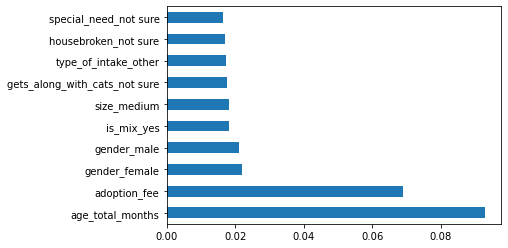

In [45]:
feat_importances = pd.Series(rfc.feature_importances_, index = X_train.columns)

feat_importances.nlargest(10).plot(kind='barh')
plt.show()